# Linear transformations over data matrix

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@gmail.com.mx
> * isc.ErickAguilar@gmail.com

---

Let $V$, $W$ be a vector spaces over $\mathbb{R}$  with $dim(V)=p$, $dim(W)=m$. Let $T: V \subset \mathbb{R}^p$ $\rightarrow$ $W \subset \mathbb{R}^m$ be a linear transformation. Then there exists a unique $p \times m$ matrix $\mathbf{A}$ such that $T\left[v\right]=A\left[v\right]$ for every $v \in V$. 

In some types of analysis a linear transformation of the data matrix it's required, so that each observation should be transformed to another vector space, note that each row could be interpreted as a vector in $\mathbb{R}^p$, so the matrix expression associated to the linear transformation have be expressed as:

$$
\begin{align*} 
\mathbf{Y}_{m\times n}  & = \mathbf{A}_{m\times p}[\mathbf{X}]'_{p\times n}  \\
\mathbf{Y'}_{n\times m} & = \mathbf{X}_{n\times p}[\mathbf{A}]'_{p\times m} \\
\mathbf{Z}_{n\times m}  & = \mathbf{X}_{n\times p}[\mathbf{B}]_{p\times m} \\
\end{align*}
$$

This transformation produces a new data matrix $\textbf{Z}$.

$$
\left[ \begin{array}{ccccc}
z_{1 1} & \cdots & z_{1 m} \\
\vdots  & \ddots & \vdots \\
z_{i 1} & \cdots & z_{i m} \\
\vdots  & \ddots & \vdots \\
z_{n 1} & \cdots & z_{n m} \end{array} \right]
= \left[ \begin{array}{ccccc}
x_{1 1} & \cdots & x_{1 j} & \cdots & x_{1 p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i 1} & \cdots & x_{i j} & \cdots & x_{i p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n 1} & \cdots & x_{n j} & \cdots & x_{n p} \end{array} \right]
\left[ \begin{array}{ccccc}
b_{1 1} & \cdots & b_{1 m} \\
\vdots  & \ddots & \vdots \\
b_{j 1} & \cdots & b_{i m} \\
\vdots  & \ddots & \vdots \\
b_{p 1} & \cdots & b_{p m} \end{array} \right]
$$

Where the k-th column could be expressed in terms of linear combinations:

$$
\begin{align*}
z_{1 k}   & = b_{1 k} x_{1 1} + \cdots b_{j k} x_{1 j} + \cdots + b_{p k} x_{1 p}   \\
\vdots    & = \vdots \\
z_{n k}   & = b_{1 k} x_{1 1} + \cdots b_{j k} x_{1 j} + \cdots + b_{p k} x_{1 p} \\
\end{align*}
$$

Properties:
*  $\mathbf{\bar{y}}=\frac{1}{n}[\textbf{1}_{1\times n}]\textbf{Y} = \frac{1}{n}[\textbf{1}_{1\times n}]\textbf{XA} = \mathbf{\bar{x}A}$
   
*  $\mathbf{S_y}=\frac{1}{n}\textbf{Y'HY}=\frac{1}{n}\textbf{[XA]'H[XA]}=\frac{1}{n}\textbf{A'X'HXA}=\textbf{A'}\frac{1}{n}\textbf{X'HX}\textbf{A}=\textbf{A'SA}$


**Example 1.2 - 1 [Computing linear transformations using Spark UDF's]**

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Column as c
from pyspark.sql.functions import array, udf, lit, col as c
from pyspark.sql import types
import numpy as np
try:
    sc = SparkContext('local[*]')
except:
    sc = SparkContext.getOrCreate('local[*]')
sqlContext = SQLContext(sc)

In [2]:
gradesPath = '../DataSets/Grades.txt'
gradesDF = sqlContext.read.format('com.databricks.spark.csv')\
                   .options(header='true',inferschema='true')\
                   .load(gradesPath)
gradesDF.toPandas()

,Student,Phisics,Maths,French,History,Literature
0,1,7,7,5,5,6
1,2,5,5,6,6,5
2,3,5,6,5,7,5
3,4,6,8,5,6,6
4,5,7,6,6,7,6
5,6,4,4,6,7,6
6,7,5,5,5,5,6
7,8,5,6,5,5,5
8,9,6,5,7,6,6
9,10,6,5,6,6,6


In [3]:
def toLiteralArray(arguments):
    return array(*[lit(value) for value in arguments])

innerProduct = udf(lambda v,w : float(np.inner(v,w)), types.FloatType() )
cols = array(c('Phisics'),c('Maths'),c('French'),c('History'),c('Literature'))
ColVector1 = toLiteralArray([1/5,1/5,1/5,1/5,1/5])
ColVector2 = toLiteralArray([1/2,1/2,0,0,0])
ColVector3 = toLiteralArray([0,0,1/3,1/3,1/3])

In [4]:
averagesGradesDF = gradesDF.select(c('Student'),\
                             innerProduct(cols,ColVector1).alias('AverageGrade'),\
                             innerProduct(cols,ColVector2).alias('Sciences'),\
                             innerProduct(cols,ColVector3).alias('Letters'))
averagesGradesDF.toPandas()

,Student,AverageGrade,Sciences,Letters
0,1,6.0,7.0,5.333333
1,2,5.4,5.0,5.666667
2,3,5.6,5.5,5.666667
3,4,6.2,7.0,5.666667
4,5,6.4,6.5,6.333333
5,6,5.4,4.0,6.333333
6,7,5.2,5.0,5.333333
7,8,5.2,5.5,5.000000
8,9,6.0,5.5,6.333333
9,10,5.8,5.5,6.000000


#### Proyection matrix
---

If $V$ it's a subspace of $\mathbb{R}^p$ whose basis is $\{\mathbf{\alpha}_1,\dotsc,\mathbf{\alpha}_k\}$ then $\forall \mathbf{v} \in V$ with $x_i=1,\dotsc, k \in \mathbb{R}$


$$
\begin{align*} 
\mathbf{v} & = x_1 \mathbf{\alpha}_1+\dotsc+x_k \mathbf{\alpha}_k \\
 & = x_1
\left[ \begin{array}{c}
\alpha_{1 1}\\
\vdots \\
\alpha_{p 1}\end{array} \right]
+\dotsc+x_k
\left[ \begin{array}{c}
\alpha_{1 k}\\
\vdots \\
\alpha_{p k}\end{array} \right] \\
& = \left[ \begin{array}{ccccc}
x_1 \alpha_{1 1} + & \cdots & + x_k \alpha_{1 k} \\
\vdots  & \ddots & \vdots  \\
x_1 \alpha_{p 1} + & \cdots & + x_k \alpha_{p k} \end{array} \right]\\
& = \left[ \begin{array}{ccccc}
\alpha_{1 1} & \cdots & \alpha_{1 k} \\
\vdots  & \ddots & \vdots  \\
\alpha_{p 1} & \cdots & \alpha_{p k} \end{array} \right]
\left[ \begin{array}{ccccc}
x_1 \\
\vdots \\
x_k \end{array} \right]\\
\mathbf{v} &= \mathbf{A}_{p \times k} \mathbf{x}_{k \times 1}
\end{align*}
$$

if $\textbf{y} \in \mathbb{R}^p $ then $Proy_V\textbf{y} \in V$ and $Proy_V\textbf{y}=\mathbf{A} \mathbf{x}$ for some $\textbf{x} \in \mathbb{R}^k $ also $\textbf{y} = Proy_V\textbf{y}+Proy_{V^{\perp}}\textbf{y}$ where $V^{\perp}= Span\left(\{\mathbf{\alpha}_1,\dotsc,\mathbf{\alpha}_k\}\right)^{\perp}=Kernel(A')$ then

$$
\begin{align*}
Proy_{V^{\perp}}\textbf{y} & = \textbf{y} - Proy_V\textbf{y} \in Kernel(A')\\
\implies \textbf{A'}\left(\textbf{y} - Proy_V\textbf{y}\right) & = \textbf{0}\\
\textbf{A'}\textbf{y} - \textbf{A'} Proy_V\textbf{y} & = \textbf{0}\\
\textbf{A'}\textbf{y} - \textbf{A'} \mathbf{A}\mathbf{x} & = \textbf{0}\\
\textbf{A'}\textbf{y} & = \textbf{A'}\mathbf{A}\mathbf{x} \\
\left(\textbf{A'}\mathbf{A}\right)^{-1}\textbf{A'}\textbf{y} & = \left(\textbf{A'}\mathbf{A}\right)^{-1}\textbf{A'}\mathbf{A}\mathbf{x} \\
\left(\textbf{A'}\mathbf{A}\right)^{-1}\textbf{A'}\textbf{y} & = \mathbf{A}^{-1}[\textbf{A'}]^{-1}\textbf{A'}\mathbf{A}\mathbf{x} \\
\left(\textbf{A'}\mathbf{A}\right)^{-1}\textbf{A'}\textbf{y} & = \mathbf{I}\mathbf{x}\\
\left(\textbf{A'}\mathbf{A}\right)^{-1}\textbf{A'}\textbf{y} & = \mathbf{x} \\
\mathbf{A}\left(\textbf{A'}\mathbf{A}\right)^{-1}\textbf{A'}\textbf{y} & = \mathbf{Ax}\\
\mathbf{A}\left(\textbf{A'}\mathbf{A}\right)^{-1}\textbf{A'}\textbf{y} & = Proy_V\textbf{y}\\
\end{align*}
$$

The matrix $\mathbf{A}\left(\textbf{A'}\mathbf{A}\right)^{-1}\textbf{A'}\textbf{y}$ are called the proyection matrix. 

**Observation:**

The centering matrix $\textbf{H}$ it's a projection matrix of the rows $\textbf{x}_i$ of the data matrix, onto the **(n-1)** dimensional subspace that is orthogonal to the nullspace $\mathbf{1}$ (This is the subspace of all n-vectors whose components sum to zero).

#### Standarized data matrix
---

The standardized data matrix is defined as that whose values $x_{ij}$ are standardized per column, i.e. $z_{ij}=\frac{x_{ij}-\bar{x}_j}{\sqrt{S_{jj}}}$, this matrix can be written as a product of linear transformations

$$
\begin{align*}
\textbf{Z}_{n \times p} & = \left[ \begin{array}{ccccc}
\frac{x_{11}-\bar{x}_{1}}{\sqrt{S_{11}}} & \cdots &  \frac{x_{i1}-\bar{x}_{1}}{\sqrt{S_{jj}}} & \cdots & \frac{x_{n1}-\bar{x}_{1}}{\sqrt{S_{pp}}}\\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{x_{1j}-\bar{x}_{2}}{\sqrt{S_{11}}} & \cdots & \frac{x_{ij}-\bar{x}_{2}}{\sqrt{S_{jj}}} & \cdots & \frac{x_{nj}-\bar{x}_{2}}{\sqrt{S_{pp}}} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
\frac{x_{1p}-\bar{x}_{p}}{\sqrt{S_{11}}} & \cdots & \frac{x_{ip}-\bar{x}_{p}}{\sqrt{S_{jj}}} & \cdots & \frac{x_{np}-\bar{x}_{p}}{\sqrt{S_{pp}}} 
\end{array} \right] \\
& = \left[ \begin{array}{ccccc}
x_{11}-\bar{x}_{1} & \cdots & x_{1j}-\bar{x}_{2} & \cdots & x_{1p}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{i1}-\bar{x}_{1} & \cdots & x_{ij}-\bar{x}_{2} & \cdots & x_{ip}-\bar{x}_{p} \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
x_{n1}-\bar{x}_{1} & \cdots & x_{nj}-\bar{x}_{2} & \cdots & x_{np}-\bar{x}_{p} 
\end{array} \right]
\left[ \begin{array}{ccccc}
\frac{1}{\sqrt{S_{11}}} & \cdots &0 & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & \frac{1}{\sqrt{S_{jj}}} & \cdots & 0 \\
\vdots  & \ddots & \vdots  & \ddots & \vdots \\
0 & \cdots & 0 & \cdots &\frac{1}{\sqrt{S_{pp}}}
\end{array} \right] \\ \\
\textbf{Z}_{n \times p} & = \textbf{H X D}^{-1/2} \\ 
\end{align*}
$$

#### Overall variability
---

Sometimes it is also useful to have an overall measure of dispersion in the data. In this measure it would be good to include all of the variables simultaneously, rather than one at a time. Consider the covariance of standarized data matrix.

$$
\begin{align*} 
\mathbf{S}_Z & = \mathbf{Z' H Z}\\
& = \frac{1}{n}\mathbf{Z' H Z}\\
& = \frac{1}{n}\mathbf{[H X D^{-1/2}]}' \mathbf{H} \mathbf{[H X D^{-1/2}]}\\
& =\frac{1}{n} \mathbf{D^{-1/2}}' \mathbf{X' H' H} \mathbf{H X D^{-1/2}}\\
& = \mathbf{D^{-1/2}}' \left[\frac{1}{n}\mathbf{ X' H X } \right] \mathbf{D^{-1/2}}\\
& = \mathbf{D^{-1/2}}' \mathbf{S_X} \mathbf{D^{-1/2}}\\
\mathbf{S}_Z & = \mathbf{R_X}\\
\end{align*}
$$

Taking the i-th, and j-th columns of the data matrix as vectors in $\mathbf{R}^n$, them the cosine angle between this vectors is given by.


$$
\begin{align*}
Cos_{X_i X_j}(\theta) & = \frac{<X_i,X_j>}{\lVert X_i \rVert \lVert X_j \rVert}\\
& = \frac{\sum_{k=1}^{n} x_{k i} x_{k j} }{\sqrt{\sum_{k=0}^{n} x_{k i}^2} \sqrt{\sum_{k=0}^{n}x_{k j}^2}}\\
& = \frac{\frac{1}{n}\sum_{k=1}^{n} x_{k i} x_{k j} }{\frac{1}{n} \sqrt{\sum_{k=0}^{n} x_{k i}^2}
\sqrt{\sum_{k=0}^{n}x_{k j}^2}}\\
& = \frac{\frac{1}{n}\sum_{k=1}^{n} x_{k i} x_{k j} }{\sqrt{\frac{1}{n} \sum_{k=0}^{n} x_{k i}^2}
\sqrt{\frac{1}{n} \sum_{k=0}^{n}x_{k j}^2}}\\
& = \frac{S_{ij}}{\sqrt{S_{ii}}\sqrt{S_{jj}}} = r_{ij}\\
& = \mathbf{R_{X}}_{i,j} \\ 
Cos_{X_i X_j}(\theta) & = \mathbf{S_{Z}}_{i,j} \\
\end{align*}
$$

Which means that the rows of the covariance matriz $\mathbf{S_{Z}}$ define a set of directing vectors given by the cosines of the angles between the columns of $\mathbf{X}$ this implies that the determinant of S can be interpreted as the hyper volume of a parallelepiped formed by the lines of $\mathbf{S_{Z}}$, so it's natural define a overall varibility measure based on this determinant.

$$
\begin{align*}
\left|\mathbf{S_{Z}} \right| & = \left| \mathbf{R_{x}} \right|\\
& = \left| \textbf{D}^{-1/2} \textbf{S_X} \textbf{D}^{-1/2} \right|\\
& = \left| \textbf{D}^{-1/2} \right|^2 \left| \textbf{S}_{X} \right|\\
& = \left[ \left(\frac{1}{S_{11}}\right) \dotsc \left( \frac{1}{S_{pp}} \right) \right] \left| \textbf{S}_{X} \right|\\
\left[ \left(S_{11}\right) \dotsc \left( S_{pp} \right) \right] \left|\mathbf{S_{Z}} \right| &= \left| \textbf{S}_{X} \right|\\
\left[ \left(S_{11}\right) \dotsc \left( S_{pp} \right) \right] \left|\mathbf{R_{X}} \right| &= \left| \textbf{S}_{X} \right|\\
\end{align*}
$$

The last equality can be interpreted as a relational proportion between the volume generated by te row vectors of $\mathbf{S_{Z}}$ and $\mathbf{S_{X}}$ where the constant proportion is the propducr of variances. Since $\mathbf{S_{Z}}$ it's based on stadarized mensuarements scales of $\mathbf{X}$  it's unafected by the change in scale. however, the relation value of $\left| \textbf{S}_{X} \right|$ will be changed whenever the multiplicative $S_{kk}$ changes. This overall varibility meansure given by $\left| \textbf{S}_{X} \right|$ it's called **generalized variance**.

There is another generalization of variance called the total variances ands is defined as:

$$
tr\left(\mathbf{S_{X}}\right) = \sum_{k=0}^n S_{kk}
$$

**Example 1.2 - 1 [Standarizing the average grades DF and computing overall variability measures ]**

Standardizing the average grades dataframe avoiding the cross join
___

In [5]:
import pyspark.sql.functions as f
stats = gradesDF.select(['Phisics','Maths','Literature']).groupBy().agg(\
                         f.mean(c('Phisics')),\
                         f.mean(c('Maths')),\
                         f.mean(c('Literature')),\
                         f.stddev(c('Phisics')),\
                         f.stddev(c('Maths')),\
                         f.stddev(c('Literature')))\
                          .toPandas().as_matrix()[0]
stdGradesDF = gradesDF.select(c('Student'),\
                      ((c('Phisics')-lit(stats[0]))/lit(stats[3]))\
                      .alias('std_Phisics'),\
                      ((c('Maths')-lit(stats[1]))/lit(stats[4]))\
                      .alias('std_Maths'),\
                      ((c('Literature')-lit(stats[2]))/lit(stats[5]))\
                      .alias('std_Literature'))
stdGradesDF.toPandas()

,Student,std_Phisics,std_Maths,std_Literature
0,1,1.193734,1.031138,0.336542
1,2,-0.795822,-0.555228,-0.625006
2,3,-0.795822,0.237955,-0.625006
3,4,0.198956,1.824321,0.336542
4,5,1.193734,0.237955,0.336542
5,6,-1.790600,-1.348411,0.336542
6,7,-0.795822,-0.555228,0.336542
7,8,-0.795822,0.237955,-0.625006
8,9,0.198956,-0.555228,0.336542
9,10,0.198956,-0.555228,0.336542


Cheking that the covariance matrix $\mathbf{S_{Z}}$ of the standarized values it's equal to the correlation matrix $\mathbf{R_{X}}$ of the original datarame.
___

In [6]:
from pyspark.mllib.linalg.distributed import RowMatrix
from pyspark.mllib.stat import Statistics

covariance_S_Z = RowMatrix(stdGradesDF\
                          .select(['std_Phisics','std_Maths','std_Literature'])\
                          .rdd.map(lambda r: [r[0:4]])).computeCovariance().toArray()
print("Covariance matrix S_Z:\n"+str(covariance_S_Z))

Covariance matrix S_Z:
[[ 1.          0.6561498   0.58398469]
 [ 0.6561498   1.          0.31711567]
 [ 0.58398469  0.31711567  1.        ]]


In [7]:
correlation_R_X = Statistics.corr(gradesDF\
                            .select(['Phisics','Maths','Literature'])\
                            .rdd.map(lambda r: [r[0:4]])) 
print("Correlation matrix R_X:\n"+str(correlation_R_X))

Correlation matrix R_X:
[[ 1.          0.6561498   0.58398469]
 [ 0.6561498   1.          0.31711567]
 [ 0.58398469  0.31711567  1.        ]]


Visualizing the directing vectors of the covariance matrix $\mathbf{S_{Z}}$
___

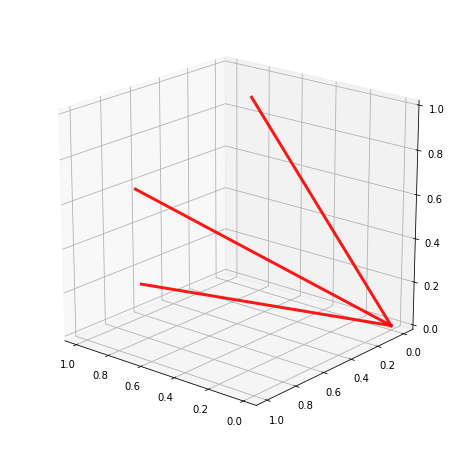

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for v in covariance_S_Z:
    ax.plot([0,v[0]], [0,v[1]], [0,v[2]], color='red', alpha=0.9, lw=3)
ax.view_init(20, 130)
plt.draw()